In [46]:
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

cctv_seoul = pd.read_csv('CCTV_Seoul.csv', encoding='utf-8')
pop_seoul = pd.read_excel("population_Seoul.xls",
                          header=2, #맨위 행 2개는 header임
                          usecols='B, D, G, J, N',
                          encoding="utf-8")

#pop_seoul정제
pop_seoul.rename(columns={
    pop_seoul.columns[0]:"구별",
    pop_seoul.columns[1]:"인구수",
    pop_seoul.columns[2]:"한국인",
    pop_seoul.columns[3]:"외국인",
    pop_seoul.columns[4]:"고령자",
}, inplace=True)

pop_seoul.drop([0], inplace=True) # 한 줄 더 버리장

#계산값 새컬럼에 붙이기
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

#컬럼명 바꾸기
pop_seoul.rename(columns = {pop_seoul.columns[0] : '구별'}, inplace=True)
print(pop_seoul)

#cctv_seoul 정제
cctv_seoul.rename(columns = {cctv_seoul.columns[0] : '구별'}, inplace=True)
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + cctv_seoul['2015년'] 
                           + cctv_seoul['2016년'] + cctv_seoul['2013년도 이전'] ) /100

print(cctv_seoul)

      구별       인구수       한국인      외국인      고령자     외국인비율      고령자비율
1    종로구  162820.0  153589.0   9231.0  25425.0  5.669451  15.615404
2     중구  133240.0  124312.0   8928.0  20764.0  6.700690  15.583909
3    용산구  244203.0  229456.0  14747.0  36231.0  6.038828  14.836427
4    성동구  311244.0  303380.0   7864.0  39997.0  2.526635  12.850689
5    광진구  372164.0  357211.0  14953.0  42214.0  4.017852  11.342849
6   동대문구  369496.0  354079.0  15417.0  54173.0  4.172440  14.661322
7    중랑구  414503.0  409882.0   4621.0  56774.0  1.114829  13.696885
8    성북구  461260.0  449773.0  11487.0  64692.0  2.490353  14.025062
9    강북구  330192.0  326686.0   3506.0  54813.0  1.061806  16.600342
10   도봉구  348646.0  346629.0   2017.0  51312.0  0.578524  14.717507
11   노원구  569384.0  565565.0   3819.0  71941.0  0.670725  12.634883
12   은평구  494388.0  489943.0   4445.0  72334.0  0.899091  14.631019
13  서대문구  327163.0  314982.0  12181.0  48161.0  3.723221  14.720797
14   마포구  389649.0  378566.0  11083.0  48765.0  

In [47]:
#merge
data_result = pd.merge(cctv_seoul, pop_seoul, on=['구별'], )
data_result

del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2013년도 이전']

data_result.sort_values(by='최근증가율', ascending=False)
#data_result.set_index('구별', inplace=True)
data_result.reset_index()
data_result.head(5)


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,32.38,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,10.10,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,8.31,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,9.11,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,21.09,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [41]:
#상관계수 (corrcoef) 분포도를 알 수 있음
# 범위 : -1 ~ +1 / 절대값이 클 수록 관계있음.
# 방향 : 음, 양 / 양의 방향 : 커지면 같이 커짐, 커질수록 작아짐 ( 기울기 )
# https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/key-results/

In [157]:
#numpy애서
np.corrcoef(data_result['고령자비율'], data_result['소계'])
#pandas에서
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.972356,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,0.972356,1.000000,0.243220,0.238638,0.027950,0.175518,-0.052302,-0.258663
인구수,0.306342,0.243220,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,0.238638,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,0.027950,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,0.175518,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.052302,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,-0.258663,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


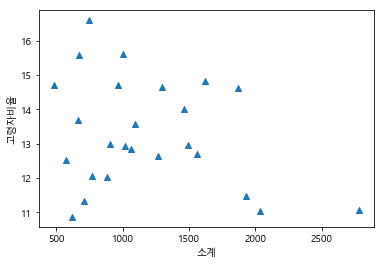

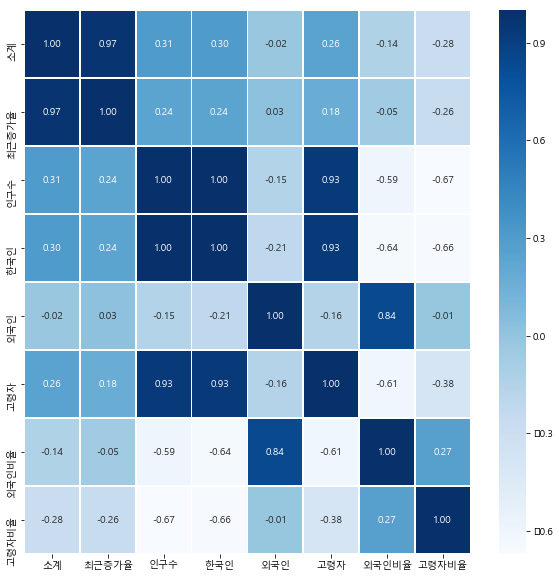

In [164]:
x = data_result['소계']
y = data_result['고령자비율']

import matplotlib.pyplot as plt
#plt.plot()
#https://matplotlib.org/gallery/index.html

plt.scatter(x, y, marker='^')

plt.xlabel('소계')
plt.ylabel('고령자비율')
plt.show()

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data = data_result.corr(), annot = True, fmt='.2f',linewidths=.5, cmap='Blues' )
#annot => Annotation 값표시 유무, cmap => color

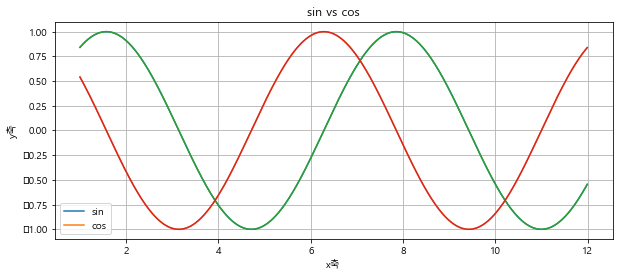

In [143]:
x = np.arange(1,12,0.01)
y = np.sin(x)
y1 = np.cos(x)
plt.figure(figsize=(10,4))

plt.plot(x,y,label='sin')
plt.plot(x,y1,label='cos')
plt.legend()

plt.xlabel("x축")
plt.ylabel("y축")
plt.title("sin vs cos")

#plt.ylim(0, 1) #y축확대 : 원하는 구간만 보여줭
#plt.xlim(0,np.pi) #x축확대

plt.plot(x,y)
plt.plot(x,y1)
plt.grid()

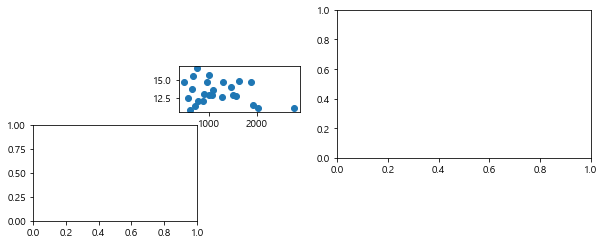

In [183]:
t = np.arange(0,5,0.5)

plt.figure(figsize=(10,6))
plt.plot(t,'r--')
plt.plot(t,'v--')
plt.plot(t,t*2,'bs')
plt.plot(t,t**2,'g^')
plt.plot(t,t**2,'gx')

#plt.subplot(221) #2x2의 1번째
plt.subplot(222) #2x2의 2번째
#plt.subplot(212) #2x1의 1번째
#plt.subplot(231) #2x1의 1번째
plt.subplot(334)
ax = plt.subplot(646)
ax.scatter(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


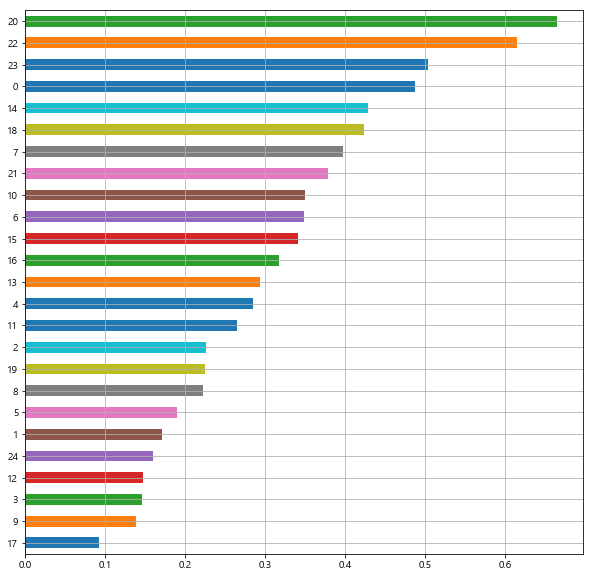

In [193]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid='True', figsize=(10,10))